# Radial Basis Function Networks (RBFN)

## XOR example (slide 9)

In [1]:
import numpy as np
from numpy import exp
from numpy import bitwise_xor as xor

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # [A, B]
result = np.array([xor(a, b) for a, b in X])  # xor(A,B)

print(result)

[0 1 1 0]


In [4]:
# Select 2 centers
mu1 = [0, 1]
mu2 = [1, 0]

# Select weights
beta1 = 0.9
beta2 = 0.9

# Bias
bias = -1

In [5]:
y = []
for k in range(len(X)):
    y.append([exp(-np.linalg.norm(X[k,:] - mu1)),
              exp(-np.linalg.norm(X[k,:] - mu2))])
    print(f"X={X[k]}, y={y[k]}")

X=[0 0], y=[0.36787944117144233, 0.36787944117144233]
X=[0 1], y=[1.0, 0.2431167344342142]
X=[1 0], y=[0.2431167344342142, 1.0]
X=[1 1], y=[0.36787944117144233, 0.36787944117144233]


In [6]:
# plot the classification map
N = 50
xx = np.linspace(-0.1, 1.1, N)
yy = np.linspace(-0.1, 1.1, N)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
ZZ = []
for k in range(N * N):
    x = xy[k,:]
    
    y = [exp(-beta1 * np.linalg.norm(x - mu1)), exp(-beta2 * np.linalg.norm(x - mu2))]
    phi = np.sum(y) + bias
    
    ZZ.append(1 if phi >=0 else 0)

ZZ = np.array(ZZ).reshape(XX.shape)

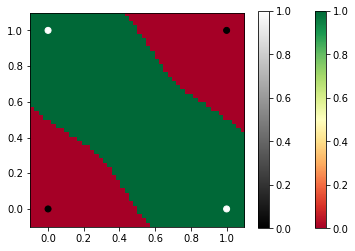

In [7]:
plt.figure()

plt.imshow(ZZ, origin='lower', 
           extent=(-0.1, 1.1, -0.1, 1.1), cmap='RdYlGn')
plt.colorbar()

plt.scatter(x=X[:,0], y=X[:,1], c=result, cmap='binary_r')
plt.colorbar()

plt.show()

End